In [2]:
# Importando os pacotes necessários:
import math
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
from astropy.io import fits
from astropy.table import Table

In [3]:
# Importando o arquivo CSV que contém os dados dos aglomerados da MW e o salvando na variável 'tab':
tab = pd.read_csv('asu.csv')

# Verificando o header completo de 'tab':
tab.head(3008)

,map,cmd,stars,MWSC,Type,RAJ2000,DEJ2000,r0,r1,r2,...,RV,d,E(B-V),logt,rc,rt,k,SType,[Fe/H],Simbad
0,,,,,,deg,deg,deg,deg,deg,...,km/s,pc,mag,[yr],pc,pc,pc-2,,[Sun],NaN
1,---,---,-----,----,-,-------,-------,-------,-------,-------,...,-------,--------,-------,-------,--------,--------,--------,---,--------,------
2,map,cmd,stars,0001,,000.067,+60.933,0.025,0.087,0.155,...,,2700,0.720,8.470,1.12,13.66,5.19,,,Simbad
3,map,cmd,stars,0002,,000.082,+50.727,0.015,0.070,0.156,...,,1953,0.146,9.255,0.61,9.93,2.67,,,Simbad
4,map,cmd,stars,0003,,000.127,+59.242,0.018,0.055,0.090,...,,2926,1.145,7.800,0.39,7.65,5.62,irc,,Simbad
5,map,cmd,stars,0004,,000.397,+64.625,0.010,0.050,0.080,...,,774,0.177,8.680,0.16,2.14,355.57,,,Simbad
6,map,cmd,stars,0005,,000.559,+67.425,0.035,0.115,0.220,...,-12.5,1000,1.241,6.100,0.55,6.51,153.96,,,Simbad
7,map,cmd,stars,0006,a,000.735,+67.500,0.120,0.345,0.760,...,0.0,850,1.099,6.100,9.54,13.56,16.73,ass,,Simbad
8,map,cmd,stars,0007,,000.885,-30.000,0.500,1.400,2.350,...,5.5,250,0.012,7.750,2.82,10.93,24.84,,-0.188,Simbad
9,map,cmd,stars,0008,,000.852,+63.580,0.018,0.055,0.135,...,,3599,0.606,8.805,1.13,14.92,4.51,,0.070,Simbad


In [4]:
# Obtendo os dados necessários para Table.txt, que são RA, Dec e distância somente dos aglomerados globulares:
for i in range(0,len(tab.map)):
    if tab.Type[i] == 'g':
        print(tab.MWSC[i],tab.RAJ2000[i],tab.DEJ2000[i],tab.d[i])

0038 006.004 -72.081     4501
0084 013.192 -26.585     8912
0099 015.825 -70.847     8603
0263 048.067 -55.216    16298
0418 071.524 +31.382    27198
0489 078.532 -40.043    12097
0528 081.046 -24.520    12892
0992 102.247 -36.005    10815
1290 114.535 +38.882    82535
1394 119.571 +26.250    22063
1636 138.013 -64.863     9612
1654 140.238 -77.282     8104
1788 154.404 -46.412     4904
1932 169.921 -65.217    13797
2004 182.526 +18.543    19305
2029 186.439 -72.659     5807
2057 189.667 -51.150    21213
2059 189.867 -26.744    10296
2077 194.892 -70.877     6595
2094 198.229 +18.168    17892
2101 199.113 +17.700    17399
2120 201.697 -47.480     5199
2152 205.548 +28.377    10194
2160 206.611 -51.374    11711
2198 211.380 +28.534    16003
2222 217.405 -05.976    25214
2238 219.901 -26.539    34992
2263 225.076 -82.214    18804
2267 225.994 -33.068    32114
2282 229.021 -00.112    23195
2285 229.351 -21.010    12502
2286 229.638 +02.081     7501
2295 232.003 -50.673     7699
2306 233.8

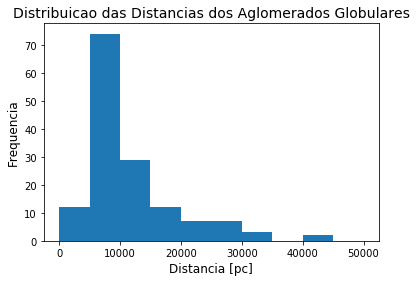

9033.59813831 154.775614499 76.1103738851
Aproximação das coordenadas equatoriais do centro da Via Láctea:
9033.6 pc
154.78 deg
76.11 deg


In [8]:
# Importando a tabela com os dados dos aglomerados globulares:
table1 = np.loadtxt('Table.txt',dtype={'names':('identification','right_ascension','declination','distance'),
                                       'formats':('i8','f8','f8','i8')}, unpack=True, delimiter=',')

identification = table1[0]
right_ascension = table1[1]
declination = table1[2]
distance = table1[3]

# Distribuição da distância dos aglomerados globulares ao centro da Via Láctea:
r = []
for i in range(0,len(identification)):
    r.append(distance[i])
        
plt.hist(r,bins=10,range=(0,50000))
plt.title('Distribuicao das Distancias dos Aglomerados Globulares',fontsize=14)
plt.xlabel('Distancia [pc]',fontsize=12)
plt.ylabel('Frequencia',fontsize=12)
plt.show()

# O histograma permite constatar que a maioria dos aglomerados estão próximos ao centro da galáxia.
# No entanto, o enunciado solicita que apenas os mais distantes sejam considerados no cálculo da
# distância média ao centro da MW, já que eles que se distribuem de forma esférica ao redor do centro.
# Sendo assim, faremos um corte em 10 kpc, ou seja, apenas aglomerados além desta distância serão 
# considerados nos próximos cálculos.

# Convertendo as coordenadas esféricas em cartesianas para os aglomerados globulares além de 10 kpc:
x = []
y = []
z = []

for i in range(0,len(identification)):
    RA = math.pi/180*right_ascension[i] #já convertida de graus para radianos
    Dec = math.pi/180*declination[i] #já convertida de graus para radianos
    d = distance[i]
    
    if d > 10000:
        x.append(d*np.sin(math.pi/2-Dec)*np.cos(RA))
        y.append(d*np.sin(math.pi/2-Dec)*np.sin(RA))
        z.append(d*np.cos(math.pi/2-Dec))
        
# Obtendo as coordenadas cartesianas do centro da Via Láctea:
x_avg = np.mean(x)
y_avg = np.mean(y)
z_avg = np.mean(z)

# Convertendo-as para coordenadas esféricas:
d_avg = (x_avg**2 + y_avg**2 + z_avg**2) ** 0.5
RA_avg = 180/math.pi * np.arctan(y_avg/x_avg) #já convertida de radianos para graus
Dec_avg = 180/math.pi * (math.pi/2 - np.arctan(np.sqrt(x_avg**2 + y_avg**2)/z_avg)) #já convertida de radianos para graus

print('Aproximação das coordenadas equatoriais do centro da Via Láctea:')
print(round(d_avg,2), 'pc')
print(round(Dec_avg,2), 'deg')
print(round(RA_avg,2), 'deg')